In [1]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
boston_data = datasets.load_boston

In [3]:
col = boston_data().feature_names

C:\Users\Dinbandhu Suman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [4]:
boston = pd.DataFrame(boston_data().data,columns=col)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

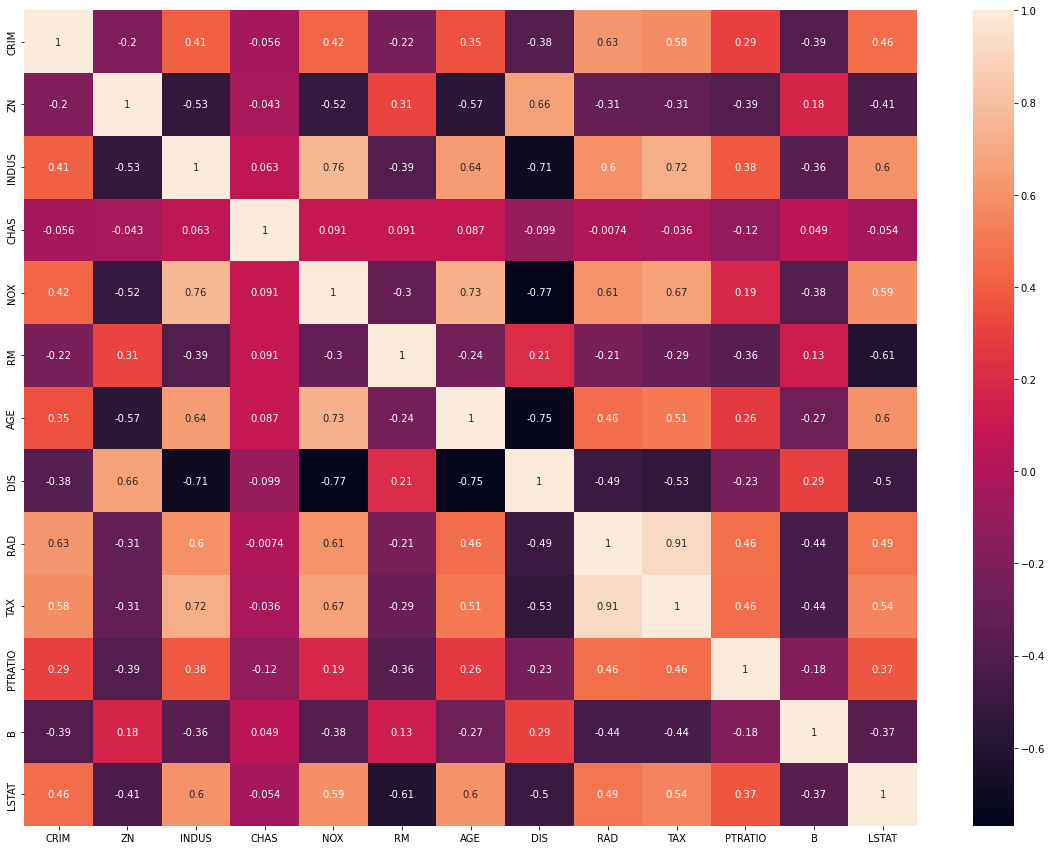

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(boston.corr(),annot=True,)

In [6]:
Target=pd.DataFrame(boston_data().target)

C:\Users\Dinbandhu Suman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [7]:
Target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
boston['Target'] = Target

In [9]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
x = boston.loc[:,'CRIM':'LSTAT']

In [11]:
x.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [12]:
y = boston.loc[:,'Target']

In [13]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Target, dtype: float64

In [14]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size=0.20,random_state=100)

In [15]:
model = LinearRegression()

In [16]:
LR = model.fit(x_train,y_train)

In [17]:
c = LR.coef_
coef_lr = pd.DataFrame()
coef_lr['coef_column'] = x_train.columns
coef_lr['Coef_values'] = pd.Series(c)
coef_lr 

,coef_column,Coef_values
0,CRIM,-0.081490
1,ZN,0.048041
2,INDUS,-0.005472
3,CHAS,3.062606
4,NOX,-16.136881
5,RM,3.672451
6,AGE,-0.008515
7,DIS,-1.517409
8,RAD,0.287271
9,TAX,-0.012121


In [18]:
y_pred_linear = LR.predict(x_test)

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [20]:
print("R2 ",r2_score(y_test,y_pred_linear))
def adj_r2(x,y):
    r2 = LR.score(x,y)
    n = x.shape[0]
    p= x.shape[1]
    adjr2 = 1-(1-r2) * (n-1)/(n-p-1)
    return adjr2
adj_r2(x_train,y_train)

R2  0.7555033086871306


0.7248577193514809

In [21]:
print("MAE",mean_absolute_error(y_test,y_pred_linear))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_linear))
print("MSE",mean_squared_error(y_test,y_pred_linear))
print("Accuracy",100-mean_absolute_percentage_error(y_test,y_pred_linear)*100)

MAE 3.248482087616415
MAPE 0.16763032390162638
MSE 23.616994100563623
Accuracy 83.23696760983736


<AxesSubplot:xlabel='coef_column', ylabel='Coef_values'>

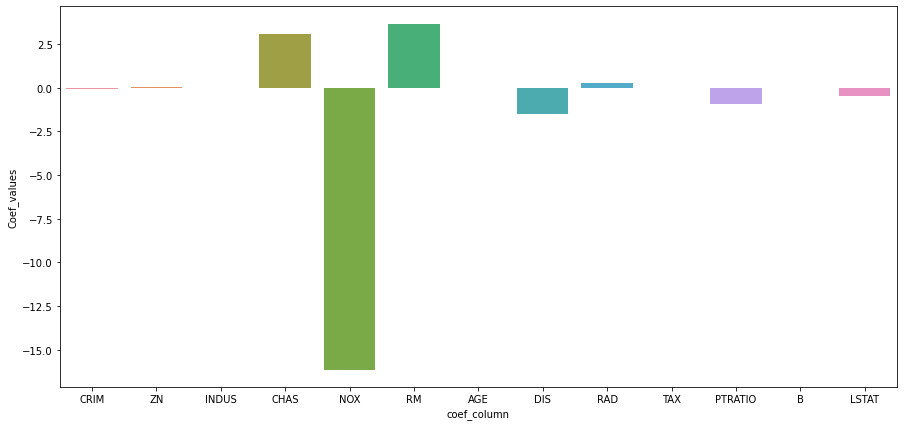

In [22]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x=coef_lr['coef_column'],y=coef_lr['Coef_values'])

# Now I Want to increase acuracy using Ridge and Lasso 

In [23]:
ridge = Ridge(alpha=2)

In [24]:
 ridge.fit(x_train,y_train)

Ridge(alpha=2)

In [25]:
y_pred_ridge = ridge.predict(x_test)

In [26]:
coef_ridge = pd.DataFrame()
coef_ridge['coef_column'] = x_train.columns
coef_ridge['coef_value'] = pd.Series(ridge.coef_)
coef_ridge

,coef_column,coef_value
0,CRIM,-0.075760
1,ZN,0.049805
2,INDUS,-0.043913
3,CHAS,2.777696
4,NOX,-6.149322
5,RM,3.701184
6,AGE,-0.017168
7,DIS,-1.369330
8,RAD,0.264858
9,TAX,-0.013198


In [27]:
print("R2 ",r2_score(y_test,y_pred_ridge))
def adj_r2(x,y):
    r2 = ridge.score(x,y)
    n = x.shape[0]
    p= x.shape[1]
    adjr2 = 1-(1-r2) * (n-1)/(n-p-1)
    return adjr2
adj_r2(x_train,y_train)

R2  0.747195642011302


0.7209324581218675

In [28]:
print("MAE",mean_absolute_error(y_test,y_pred_ridge))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_ridge))
print("MSE",mean_squared_error(y_test,y_pred_ridge))
print("Accuracy",100-mean_absolute_percentage_error(y_test,y_pred_ridge)*100)

MAE 3.3114774111042053
MAPE 0.1712403132270683
MSE 24.4194675975216
Accuracy 82.87596867729317


<AxesSubplot:xlabel='coef_column', ylabel='coef_value'>

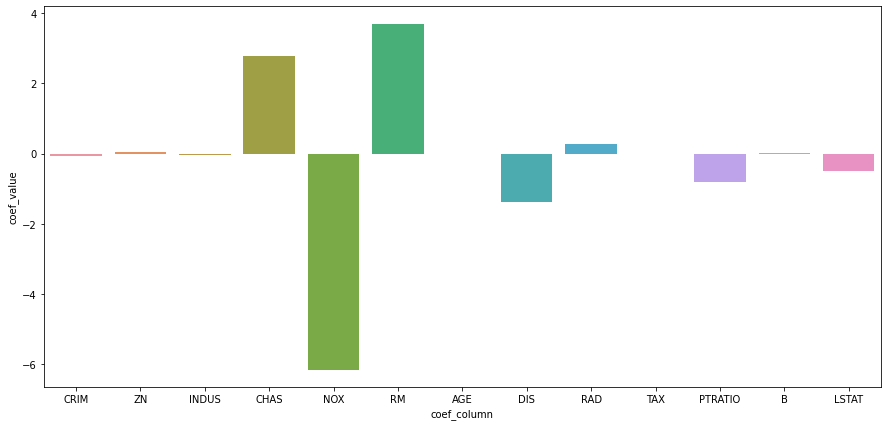

In [29]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x=coef_ridge['coef_column'],y=coef_ridge['coef_value'])

# Lasso-------------

In [30]:
lasso = Lasso(alpha=0.5)

In [31]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.5)

In [32]:
y_pred_lasso = lasso.predict(x_test)

In [33]:
coef_lasso = pd.DataFrame()
coef_lasso['Coef_column'] = x_train.columns
coef_lasso['Coef_values'] = pd.Series(lasso.coef_)
coef_lasso

,Coef_column,Coef_values
0,CRIM,-0.054315
1,ZN,0.053349
2,INDUS,-0.008796
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.260415
6,AGE,-0.000000
7,DIS,-0.958966
8,RAD,0.276282
9,TAX,-0.016316


In [34]:
print("R2 ",r2_score(y_test,y_pred_lasso))
def adj_r2(x,y):
    r2 = lasso.score(x,y)
    n = x.shape[0]
    p= x.shape[1]
    adjr2 = 1-(1-r2) * (n-1)/(n-p-1)
    return adjr2
adj_r2(x_train,y_train)

R2  0.7221488877558382


0.6951429245344551

In [35]:
print("MAE",mean_absolute_error(y_test,y_pred_lasso))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_lasso))
print("MSE",mean_squared_error(y_test,y_pred_lasso))
print("Accuracy",100-mean_absolute_percentage_error(y_test,y_pred_lasso)*100)

MAE 3.5532205069804945
MAPE 0.17804518202946326
MSE 26.83884204513982
Accuracy 82.19548179705367


<AxesSubplot:xlabel='Coef_column', ylabel='Coef_values'>

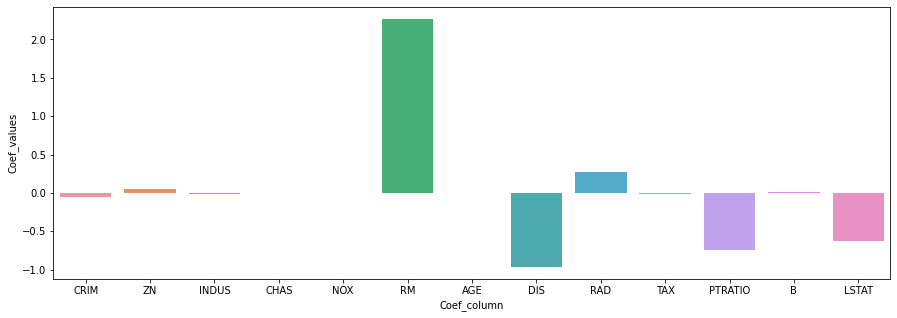

In [36]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(x=coef_lasso['Coef_column'],y=coef_lasso['Coef_values'])